<a href="https://colab.research.google.com/github/abh2050/Codes-/blob/master/03.10.22.Data_and_Sampling_Distribution_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving players.csv to players.csv


In [2]:
players_data_import= pd.read_csv("players.csv")
players_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [12]:
players_data_import['height_inches'] = players_data_import["height"].apply(lambda x : int(x.split("-")[0])*12+ int(x.split("-")[1]) if len(x.split("-"))==2 else int(x))

In [13]:
players_data_import

,nflId,height,weight,birthDate,collegeName,Position,displayName,height_inches
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe,73
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier,72
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem,72
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich,73
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen,73
...,...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton,75
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes,75
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron,69
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill,73


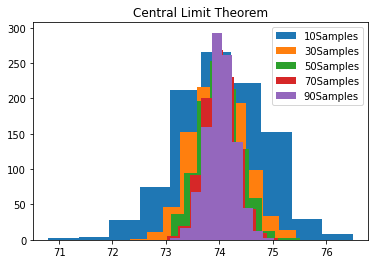

In [15]:
import matplotlib.pyplot as plt
sample_amounts = range(10,100, 20)

for x in sample_amounts:
  samples = []
  for i in range(1000):
    samples.append(players_data_import['height_inches'].sample(x).mean())
  plt.hist(samples)
  plt.legend([str(z)+ "Samples" for z in sample_amounts])
  plt.title("Central Limit Theorem")

In [16]:
players_data_import["height_inches"].sem()


0.05065243293253027

In [31]:
from sklearn.utils import resample 

results = []
for nrepeat in range(1000):
  sample = resample(players_data_import["height_inches"])
  results.append(sample.mean())
results = pd.Series(results)
print("Bootstrap Statistics: ")
print(f'original:{players_data_import["height_inches"].mean()}')
print(f'bias:{results.mean()- players_data_import["height_inches"].mean()}')
print(f'std.error:{results.std()}')

Bootstrap Statistics: 
original:74.0106149341142
bias:-0.0020790629574634067
std.error:0.051577322069850544


In [32]:
resample(players_data_import["height_inches"]).mean()


74.03660322108345

In [34]:
#Confidence Interval
import numpy as np
import scipy.stats as st

#Define Sample Data
data = players_data_import["height_inches"]

#Create 95% confidence interval for population mean weight
st.t.interval(alpha = 0.95, df= len(data)-1,loc=np.mean(data),scale=st.sem(data))

(73.91129397164735, 74.10993589658105)

In [35]:
#Confidence Interval by collecting 1500 records
import numpy as np
import scipy.stats as st

#Define Sample Data
np.random.seed(0)
data = players_data_import["height_inches"].sample(1500)

#Create 95% confidence interval for population mean weight
st.t.interval(alpha = 0.95, df= len(data)-1,loc=np.mean(data),scale=st.sem(data))

(73.92579453716581, 74.1902054628342)

Normal/Gaussian Distribution

((array([-3.31270533, -3.05604344, -2.91334469, ...,  2.91334469,
          3.05604344,  3.31270533]), array([66, 66, 66, ..., 81, 81, 81])),
 (2.648465434368531, 73.95066666666666, 0.9899584212467638))

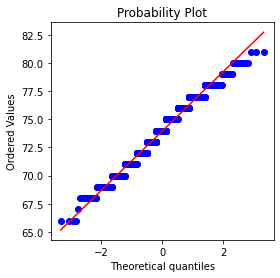

In [38]:
from scipy import stats
fig,ax =plt.subplots(figsize=(4,4))
norm_sample = players_data_import["height_inches"].sample(1500)
stats.probplot(norm_sample,plot=ax)

Student T-distribution